In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import shap


In [35]:
import os
os.getcwd()


'c:\\Users\\bhara\\OneDrive\\Desktop\\Space-opitimizer\\backend'

In [36]:
df = pd.read_csv("../data/demo_data.csv")

In [37]:
import os
print(os.getcwd())


c:\Users\bhara\OneDrive\Desktop\Space-opitimizer\backend


In [38]:
os.listdir("..")


['.git', 'backend', 'client', 'data', 'package.json', 'README.md']

In [39]:
os.listdir("../data")


['demo_data.csv']

In [40]:
le = LabelEncoder()
df["pollution_level_encoded"] = le.fit_transform(df["pollution_level"])


In [41]:
features = [
    "AQI", "PM2_5", "PM10", "BOD",
    "waste_tons_per_day",
    "green_cover_percent",
    "population_density"
]

X = df[features]
y = (
    0.30 * df["AQI"] +
    0.20 * df["BOD"] +
    0.15 * df["waste_tons_per_day"] +
    0.15 * df["PM2_5"] +
    0.10 * df["PM10"] +
    0.10 * (100 - df["green_cover_percent"]) +
    0.05 * df["population_density"]
)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify rows with NaN in y_train
nan_in_y_train = y_train.isna()

# Remove rows with NaN from both X_train and y_train
X_train = X_train[~nan_in_y_train]
y_train = y_train[~nan_in_y_train]

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [47]:
import sys
print(sys.version)



3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]


In [45]:
import matplotlib
import shap

print(matplotlib.__version__)
print(shap.__version__)


3.10.8
0.50.0


In [48]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)


In [49]:
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

shap_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": mean_abs_shap
}).sort_values(by="Importance", ascending=True)


Matplotlib is building the font cache; this may take a moment.


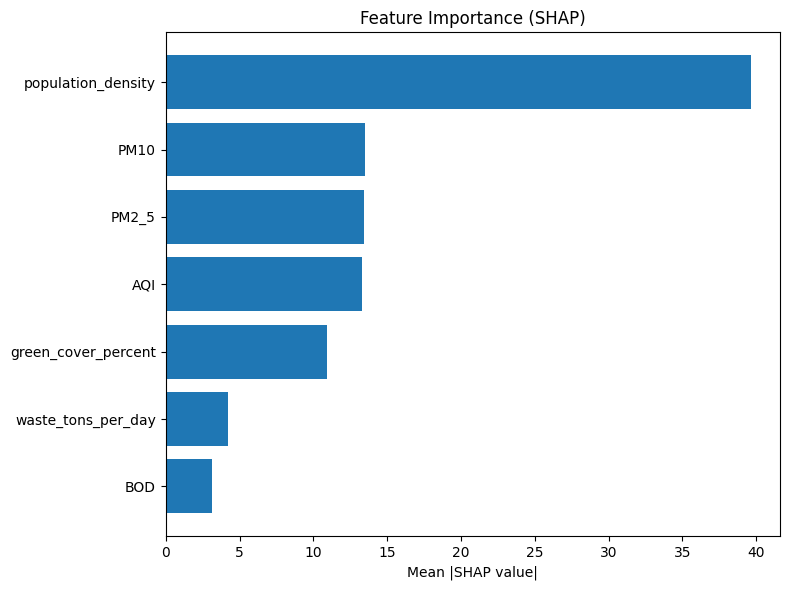

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(shap_df["Feature"], shap_df["Importance"])
plt.xlabel("Mean |SHAP value|")
plt.title("Feature Importance (SHAP)")
plt.tight_layout()
plt.show()


In [51]:
import joblib
joblib.dump(model, "model.pkl")
print("model.pkl saved")


model.pkl saved


In [52]:
df["priority_score"] = model.predict(X)


In [54]:
# def priority_category(score):
#     if score >= 75:
#         return "High"
#     elif score >= 45:
#         return "Medium"
#     else:
#         return "Low"

# df["priority_level"] = df["priority_score"].apply(priority_category)

# df[["sub_area_name", "priority_score", "priority_level"]]


high_threshold = df["priority_score"].quantile(0.66)
medium_threshold = df["priority_score"].quantile(0.33)

def assign_priority(score):
    if score >= high_threshold:
        return "High"
    elif score >= medium_threshold:
        return "Medium"
    else:
        return "Low"

df["priority_label"] = df["priority_score"].apply(assign_priority)



In [55]:
final_df = df[[
    "sub_area_name",
    "parent_area",
    "latitude",
    "longitude",
    "priority_score",
    "priority_label"
]]

final_df


sub_area_name      parent_area  latitude  longitude  \
0                 Katraj Lake           Katraj   18.4500    73.8600   
1       Ambegaon Budruk Chowk           Katraj   18.4555    73.8650   
2        PMT Bus Stand Katraj           Katraj   18.4580    73.8675   
3            Rajiv Gandhi Zoo           Katraj   18.4445    73.8550   
4   Bharati Vidyapeeth Campus           Katraj   18.4525    73.8585   
..                        ...              ...       ...        ...   
69     Pimple Saudagar Garden  Pimple Saudagar   18.5960    73.7950   
70       Bhosari MIDC Phase 2          Bhosari   18.6200    73.8400   
71             Thergaon Chowk         Thergaon   18.6170    73.7730   
72            Punawale Bridge         Punawale   18.6460    73.7480   
73       Dehu Road Cantonment        Dehu Road   18.6900    73.7600   

    priority_score priority_label  
0        719.63050            Low  
1        781.95300         Medium  
2        901.52050           High  
3        484.57950            Low  
4        599.85975            Low  
..             ...            ...  
69       539.06325            Low  
70       942.70225           High  
71       783.23325         Medium  
72       679.51325            Low  
73       833.24700           High  

[74 rows x 6 columns]

In [56]:
high_priority_areas = final_df[final_df["priority_label"] == "High"]
high_priority_areas


sub_area_name   parent_area  latitude  longitude  \
2        PMT Bus Stand Katraj        Katraj   18.4580    73.8675   
5          Katraj Tunnel Area        Katraj   18.4400    73.8500   
11           Jambhulwadi Road        Katraj   18.4380    73.8480   
13             Trimurti Chowk        Katraj   18.4570    73.8660   
15            Padmavati Chowk        Katraj   18.4585    73.8690   
19         Shivshankar Colony        Katraj   18.4615    73.8710   
21            Katraj Bus Stop        Katraj   18.4560    73.8660   
23          Vadgaon BK Market        Katraj   18.4645    73.8745   
25         Navale Bridge Area        Katraj   18.4725    73.8820   
27             Trimurti Nagar        Katraj   18.4710    73.8810   
28  Katraj-Dehu Road Junction        Katraj   18.4550    73.8705   
33         Hadapsar Bus Depot      Hadapsar   18.5005    73.9200   
34        Mundhwa River Point      Hadapsar   18.5200    73.9400   
36   Ramtekdi Industrial Area      Hadapsar   18.4950    73.9100   
38     Shivajinagar Bus Stand  Shivajinagar   18.5300    73.8470   
39           FC Road Junction  Shivajinagar   18.5220    73.8450   
41  Pune Railway Station Area  Shivajinagar   18.5280    73.8740   
45               Warje Bridge       Kothrud   18.4860    73.7820   
53              Pimpri Market        Pimpri   18.6175    73.8040   
54     Chinchwad Station Area     Chinchwad   18.6290    73.7990   
60                Chakan MIDC        Chakan   18.7606    73.8637   
63       Bibwewadi Canal Area     Bibwewadi   18.4685    73.8720   
67             Mundhwa Bridge       Mundhwa   18.5260    73.9360   
70       Bhosari MIDC Phase 2       Bhosari   18.6200    73.8400   
73       Dehu Road Cantonment     Dehu Road   18.6900    73.7600   

    priority_score priority_label  
2        901.52050           High  
5        842.69800           High  
11       832.01975           High  
13       857.71225           High  
15       811.40325           High  
19       835.24475           High  
21       865.68200           High  
23       811.40325           High  
25       884.05250           High  
27       835.61725           High  
28       916.59025           High  
33       834.97950           High  
34       887.45450           High  
36       937.83600           High  
38       932.52750           High  
39       834.97950           High  
41       881.62700           High  
45       844.62625           High  
53       845.89400           High  
54       809.25175           High  
60       942.70225           High  
63       845.16875           High  
67       887.45450           High  
70       942.70225           High  
73       833.24700           High

In [ ]:
!pip install requests pillow matplotlib


In [57]:
AZURE_MAPS_KEY = "EuebTpSmENvCqPUYIQZfbZRT0Ze8JnI9bHHXVaGuD4XzysWtiot2JQQJ99CBACYeBjFGUsJ1AAAgAZMP37E7"



In [59]:
import requests
from PIL import Image
from io import BytesIO

def fetch_satellite_image(lat, lon, zoom=17, size=512):
    url = "https://atlas.microsoft.com/map/static/png"

    params = {
        "subscription-key": AZURE_MAPS_KEY,
        "api-version": "1.0",
        "layer": "satellite",
        "style": "main",
        "center": f"{lon},{lat}",
        "zoom": zoom,
        "width": size,
        "height": size
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        print("Error fetching image:", response.status_code)
        return None


In [60]:
import requests
from PIL import Image
from io import BytesIO

def fetch_satellite_image(lat, lon, zoom=16, size=512):
    url = "https://atlas.microsoft.com/map/static/png"

    params = {
        "subscription-key": AZURE_MAPS_KEY,
        "api-version": "1.0",
        "tilesetId": "microsoft.imagery",
        "center": f"{lon},{lat}",   # longitude FIRST (important)
        "zoom": zoom,
        "width": size,
        "height": size
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        print("Error fetching image:", response.status_code)
        print(response.text)  # <-- helps debugging
        return None


In [62]:
print(AZURE_MAPS_KEY)


EuebTpSmENvCqPUYIQZfbZRT0Ze8JnI9bHHXVaGuD4XzysWtiot2JQQJ99CBACYeBjFGUsJ1AAAgAZMP37E7


In [ ]:
# import time

# for _, row in high_priority_areas.iterrows():
#     print(f"📍 Area: {row['sub_area_name']}")

#     img = fetch_satellite_image(
#         lat=row["latitude"],
#         lon=row["longitude"]
#     )

#     if img:
#         plt.imshow(img)
#         plt.axis("off")
#         plt.show()

#     time.sleep(3)  # ⬅ REQUIRED (2–5 seconds)


In [68]:
MAX_IMAGES = 3   # 👈 very important

for i, (_, row) in enumerate(high_priority_areas.iterrows()):
    if i >= MAX_IMAGES:
        break


In [ ]:
# import time
# import requests
# from PIL import Image
# from io import BytesIO

# def fetch_satellite_image(lat, lon, zoom=14, size=512, retries=3):
#     url = "https://atlas.microsoft.com/map/static/png"

#     params = {
#         "subscription-key": AZURE_MAPS_KEY,
#         "api-version": "1.0",
#         "center": f"{lon},{lat}",
#         "zoom": zoom,
#         "width": size,
#         "height": size,
#         "layer": "satellite"
#     }

#     headers = {
#         "User-Agent": "Mozilla/5.0"
#     }

#     for attempt in range(retries):
#         try:
#             response = requests.get(
#                 url,
#                 params=params,
#                 headers=headers,
#                 timeout=10
#             )

#             if response.status_code == 200:
#                 return Image.open(BytesIO(response.content))

#             print("HTTP error:", response.status_code)

#         except requests.exceptions.RequestException as e:
#             print(f"Retry {attempt+1}/{retries} failed:", e)
#             time.sleep(5)   # 👈 exponential backoff

#     return None


In [ ]:
# import time

# for i, (_, row) in enumerate(high_priority_areas.iterrows()):
#     if i >= 3:
#         break

#     print(f"📍 Area: {row['sub_area_name']}")

#     img = fetch_satellite_image(
#         lat=row["latitude"],
#         lon=row["longitude"]
#     )

#     if img:
#         plt.imshow(img)
#         plt.axis("off")
#         plt.show()
#         plt.close()

#     time.sleep(6)  # 👈 NOT 2 or 3, use 5–8 seconds


In [73]:
### this is for debuging the above error
import requests
from PIL import Image
from io import BytesIO
import time

def fetch_satellite_image(lat, lon, zoom=14, size=512, retries=3):
    url = "https://atlas.microsoft.com/map/static/png"

    params = {
        "subscription-key": AZURE_MAPS_KEY,
        "api-version": "1.0",
        "center": f"{lon},{lat}",
        "zoom": zoom,
        "width": size,
        "height": size,
        "maptype": "satellite"   # 🔥 THIS FIXES 400 ERROR
    }

    headers = {
        "User-Agent": "Mozilla/5.0"
    }

    for attempt in range(retries):
        try:
            response = requests.get(
                url,
                params=params,
                headers=headers,
                timeout=10
            )

            if response.status_code == 200:
                return Image.open(BytesIO(response.content))
            else:
                print("HTTP error:", response.status_code, response.text)

        except requests.exceptions.RequestException as e:
            print(f"Retry {attempt+1}/{retries} failed:", e)
            time.sleep(6)

    return None


📍 Area: PMT Bus Stand Katraj
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 3/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
📍 Area: Katraj Tunnel Area
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


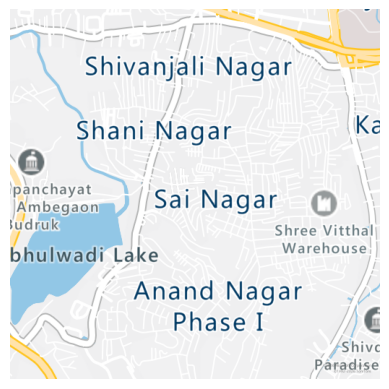

📍 Area: Jambhulwadi Road


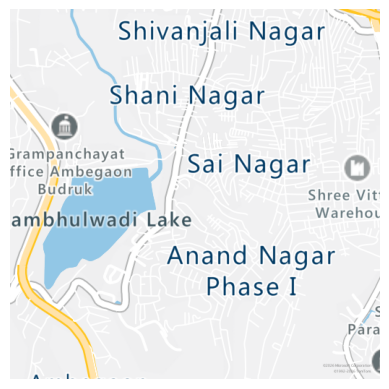

In [75]:
import time

MAX_IMAGES = 3

for i, (_, row) in enumerate(high_priority_areas.iterrows()):
    if i >= MAX_IMAGES:
        break

    print(f"📍 Area: {row['sub_area_name']}")

    img = fetch_satellite_image(
        lat=float(row["latitude"]),
        lon=float(row["longitude"])
    )

    if img:
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        plt.close()

    time.sleep(7)


📍 Area: PMT Bus Stand Katraj
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 3/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
📍 Area: Katraj Tunnel Area


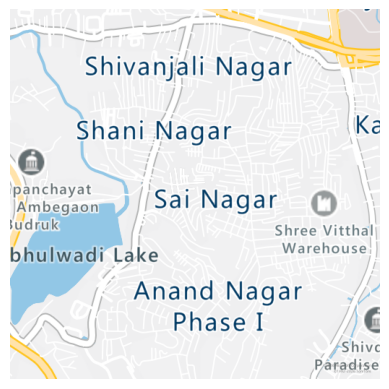

📍 Area: Jambhulwadi Road
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


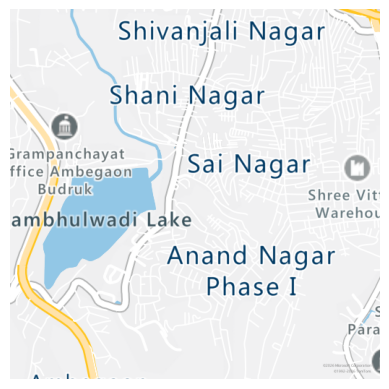

📍 Area: Trimurti Chowk


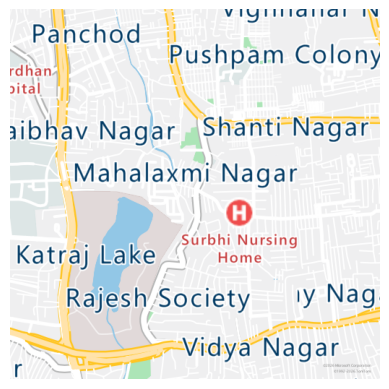

📍 Area: Padmavati Chowk


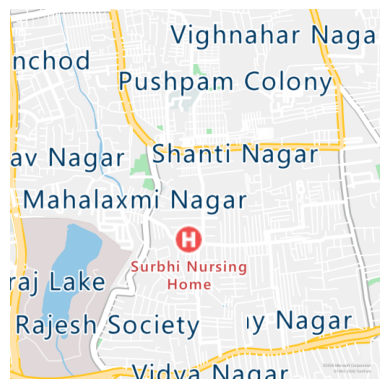

📍 Area: Shivshankar Colony


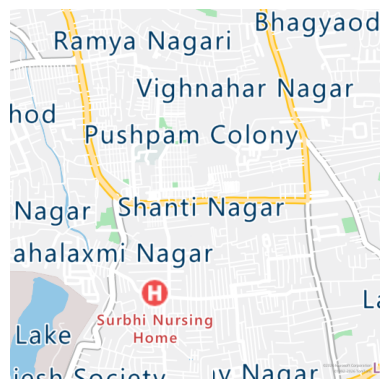

📍 Area: Katraj Bus Stop
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


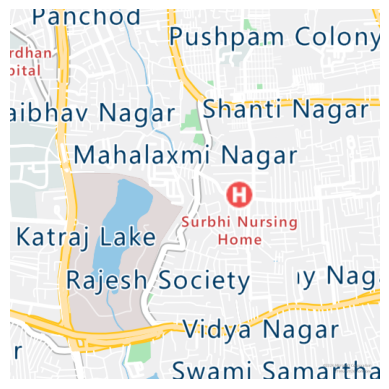

📍 Area: Vadgaon BK Market
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 3/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
📍 Area: Navale Bridge Area
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


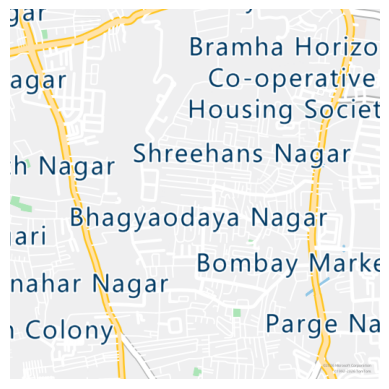

📍 Area: Trimurti Nagar
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


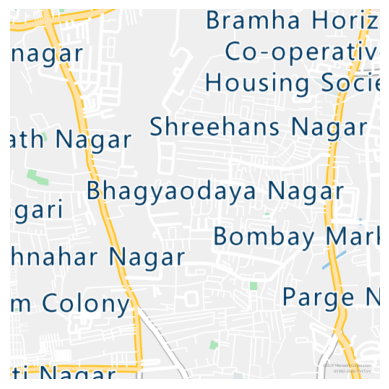

📍 Area: Katraj-Dehu Road Junction


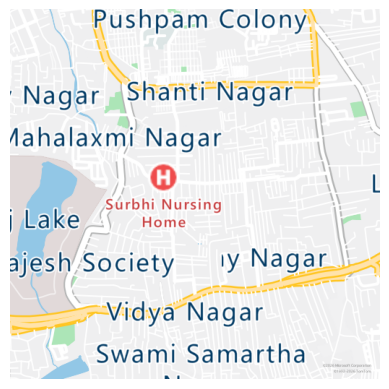

📍 Area: Hadapsar Bus Depot


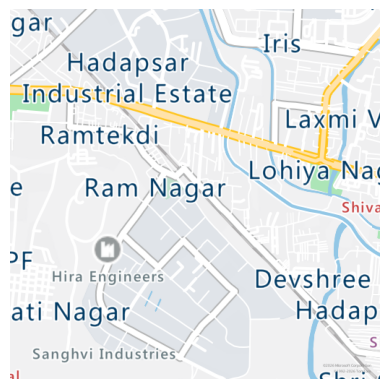

📍 Area: Mundhwa River Point


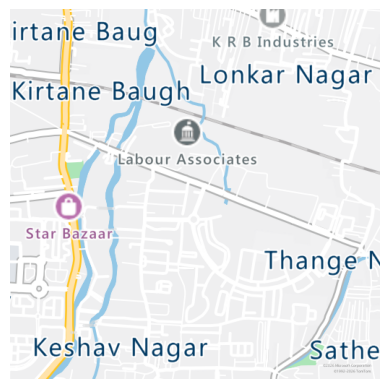

📍 Area: Ramtekdi Industrial Area


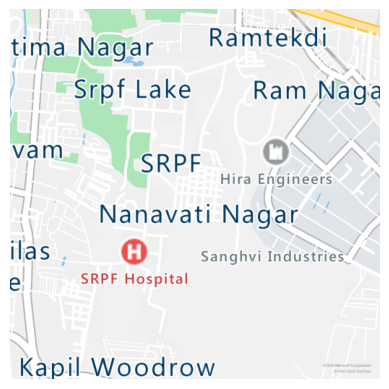

📍 Area: Shivajinagar Bus Stand
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 3/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
📍 Area: FC Road Junction
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


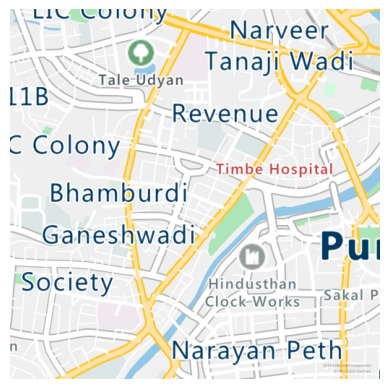

📍 Area: Pune Railway Station Area
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


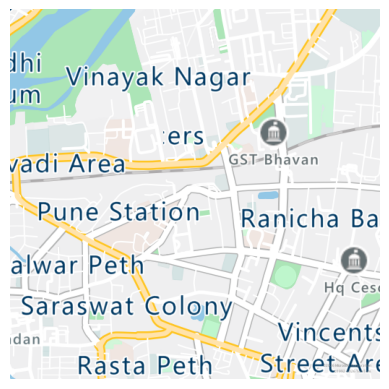

📍 Area: Warje Bridge
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


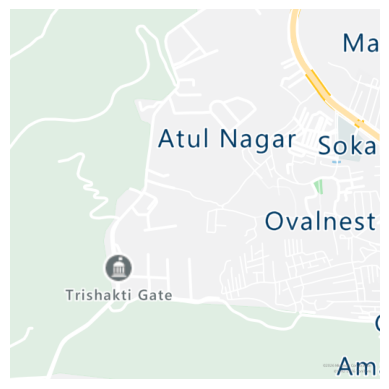

📍 Area: Pimpri Market
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Retry 2/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


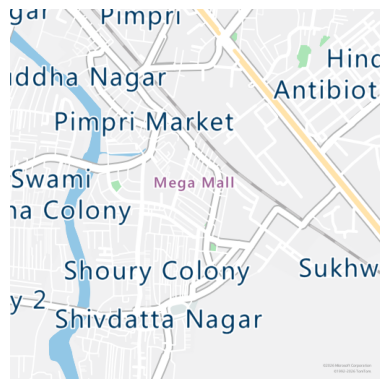

📍 Area: Chinchwad Station Area


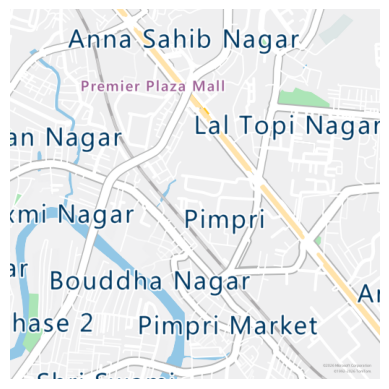

📍 Area: Chakan MIDC


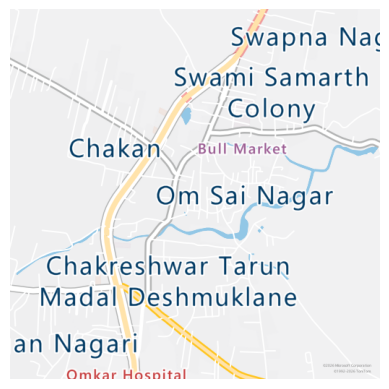

📍 Area: Bibwewadi Canal Area


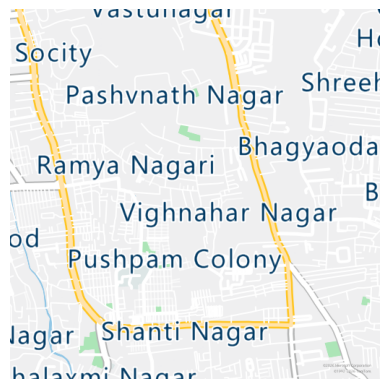

📍 Area: Mundhwa Bridge
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


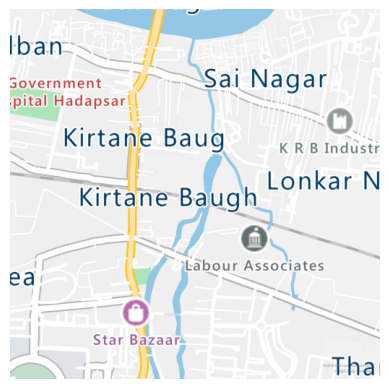

📍 Area: Bhosari MIDC Phase 2


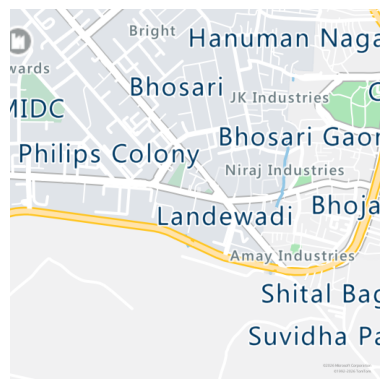

📍 Area: Dehu Road Cantonment
Retry 1/3 failed: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


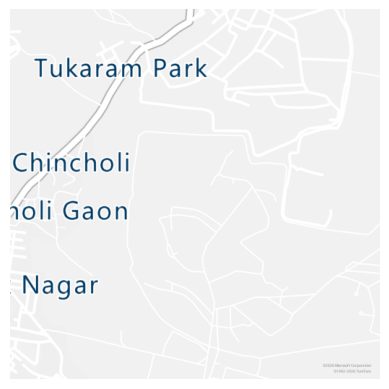

In [76]:
for _, row in high_priority_areas.iterrows():
    print(f"📍 Area: {row['sub_area_name']}")

    img = fetch_satellite_image(
        lat=row["latitude"],
        lon=row["longitude"]
    )

    if img:
        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [77]:
high_priority_areas = df[df["priority_label"] == "High"].reset_index(drop=True)
high_priority_areas


sub_area_name   parent_area  latitude  longitude    AQI  \
0        PMT Bus Stand Katraj        Katraj   18.4580    73.8675  160.0   
1          Katraj Tunnel Area        Katraj   18.4400    73.8500  155.0   
2            Jambhulwadi Road        Katraj   18.4380    73.8480  150.0   
3              Trimurti Chowk        Katraj   18.4570    73.8660  155.0   
4             Padmavati Chowk        Katraj   18.4585    73.8690  150.0   
5          Shivshankar Colony        Katraj   18.4615    73.8710  150.0   
6             Katraj Bus Stop        Katraj   18.4560    73.8660  155.0   
7           Vadgaon BK Market        Katraj   18.4645    73.8745  150.0   
8          Navale Bridge Area        Katraj   18.4725    73.8820  155.0   
9              Trimurti Nagar        Katraj   18.4710    73.8810  150.0   
10  Katraj-Dehu Road Junction        Katraj   18.4550    73.8705  160.0   
11         Hadapsar Bus Depot      Hadapsar   18.5005    73.9200  150.0   
12        Mundhwa River Point      Hadapsar   18.5200    73.9400  155.0   
13   Ramtekdi Industrial Area      Hadapsar   18.4950    73.9100  160.0   
14     Shivajinagar Bus Stand  Shivajinagar   18.5300    73.8470  160.0   
15           FC Road Junction  Shivajinagar   18.5220    73.8450  150.0   
16  Pune Railway Station Area  Shivajinagar   18.5280    73.8740  155.0   
17               Warje Bridge       Kothrud   18.4860    73.7820  150.0   
18              Pimpri Market        Pimpri   18.6175    73.8040  155.0   
19     Chinchwad Station Area     Chinchwad   18.6290    73.7990  150.0   
20                Chakan MIDC        Chakan   18.7606    73.8637  165.0   
21       Bibwewadi Canal Area     Bibwewadi   18.4685    73.8720  150.0   
22             Mundhwa Bridge       Mundhwa   18.5260    73.9360  155.0   
23       Bhosari MIDC Phase 2       Bhosari   18.6200    73.8400  165.0   
24       Dehu Road Cantonment     Dehu Road   18.6900    73.7600  150.0   

    PM2_5   PM10   BOD  waste_tons_per_day  green_cover_percent  \
0    95.0  140.0  14.0                25.0                 10.0   
1    88.0  135.0  13.0                22.0                 15.0   
2    85.0  130.0  12.0                22.0                 16.0   
3    90.0  135.0  13.0                23.0                 14.0   
4    85.0  130.0  13.0                22.0                 16.0   
5    85.0  130.0  13.0                22.0                 15.0   
6    90.0  135.0  14.0                24.0                 12.0   
7    85.0  130.0  13.0                22.0                 16.0   
8    90.0  135.0  14.0                25.0                 14.0   
9    85.0  130.0  13.0                23.0                 15.0   
10   95.0  140.0  15.0                26.0                 10.0   
11   85.0  130.0  12.0                22.0                 15.0   
12   90.0  135.0  14.0                25.0                 12.0   
13   95.0  140.0  15.0                28.0                 10.0   
14   95.0  145.0  14.0                26.0                 10.0   
15   85.0  130.0  12.0                22.0                 15.0   
16   90.0  135.0  13.0                24.0                 12.0   
17   85.0  130.0  12.0                22.0                 14.0   
18   90.0  135.0  13.0                25.0                 15.0   
19   85.0  130.0  12.0                24.0                 18.0   
20   95.0  145.0  15.0                28.0                 12.0   
21   85.0  130.0  13.0                23.0                 14.0   
22   90.0  135.0  14.0                25.0                 12.0   
23   95.0  145.0  15.0                28.0                 12.0   
24   85.0  130.0  13.0                24.0                 16.0   

    population_density  temperature  rainfall pollution_level  \
0              16000.0         29.0       4.0            High   
1              15000.0         28.0       3.0            High   
2              15000.0         28.0       3.0            High   
3              15500.0         29.0       4.0            High 

In [78]:
FEATURES = [
    "AQI",
    "PM2_5",
    "PM10",
    "BOD",
    "waste_tons_per_day",
    "green_cover_percent",
    "population_density"
]

In [79]:
high_priority_df = df[df["priority_label"] == "High"].reset_index()
high_priority_df


index              sub_area_name   parent_area  latitude  longitude  \
0       2       PMT Bus Stand Katraj        Katraj   18.4580    73.8675   
1       5         Katraj Tunnel Area        Katraj   18.4400    73.8500   
2      11           Jambhulwadi Road        Katraj   18.4380    73.8480   
3      13             Trimurti Chowk        Katraj   18.4570    73.8660   
4      15            Padmavati Chowk        Katraj   18.4585    73.8690   
5      19         Shivshankar Colony        Katraj   18.4615    73.8710   
6      21            Katraj Bus Stop        Katraj   18.4560    73.8660   
7      23          Vadgaon BK Market        Katraj   18.4645    73.8745   
8      25         Navale Bridge Area        Katraj   18.4725    73.8820   
9      27             Trimurti Nagar        Katraj   18.4710    73.8810   
10     28  Katraj-Dehu Road Junction        Katraj   18.4550    73.8705   
11     33         Hadapsar Bus Depot      Hadapsar   18.5005    73.9200   
12     34        Mundhwa River Point      Hadapsar   18.5200    73.9400   
13     36   Ramtekdi Industrial Area      Hadapsar   18.4950    73.9100   
14     38     Shivajinagar Bus Stand  Shivajinagar   18.5300    73.8470   
15     39           FC Road Junction  Shivajinagar   18.5220    73.8450   
16     41  Pune Railway Station Area  Shivajinagar   18.5280    73.8740   
17     45               Warje Bridge       Kothrud   18.4860    73.7820   
18     53              Pimpri Market        Pimpri   18.6175    73.8040   
19     54     Chinchwad Station Area     Chinchwad   18.6290    73.7990   
20     60                Chakan MIDC        Chakan   18.7606    73.8637   
21     63       Bibwewadi Canal Area     Bibwewadi   18.4685    73.8720   
22     67             Mundhwa Bridge       Mundhwa   18.5260    73.9360   
23     70       Bhosari MIDC Phase 2       Bhosari   18.6200    73.8400   
24     73       Dehu Road Cantonment     Dehu Road   18.6900    73.7600   

      AQI  PM2_5   PM10   BOD  waste_tons_per_day  green_cover_percent  \
0   160.0   95.0  140.0  14.0                25.0                 10.0   
1   155.0   88.0  135.0  13.0                22.0                 15.0   
2   150.0   85.0  130.0  12.0                22.0                 16.0   
3   155.0   90.0  135.0  13.0                23.0                 14.0   
4   150.0   85.0  130.0  13.0                22.0                 16.0   
5   150.0   85.0  130.0  13.0                22.0                 15.0   
6   155.0   90.0  135.0  14.0                24.0                 12.0   
7   150.0   85.0  130.0  13.0                22.0                 16.0   
8   155.0   90.0  135.0  14.0                25.0                 14.0   
9   150.0   85.0  130.0  13.0                23.0                 15.0   
10  160.0   95.0  140.0  15.0                26.0                 10.0   
11  150.0   85.0  130.0  12.0                22.0                 15.0   
12  155.0   90.0  135.0  14.0                25.0                 12.0   
13  160.0   95.0  140.0  15.0                28.0                 10.0   
14  160.0   95.0  145.0  14.0                26.0                 10.0   
15  150.0   85.0  130.0  12.0                22.0                 15.0   
16  155.0   90.0  135.0  13.0                24.0                 12.0   
17  150.0   85.0  130.0  12.0                22.0                 14.0   
18  155.0   90.0  135.0  13.0                25.0                 15.0   
19  150.0   85.0  130.0  12.0                24.0                 18.0   
20  165.0   95.0  145.0  15.0                28.0                 12.0   
21  150.0   85.0  130.0  13.0                23.0                 14.0   
22  155.0   90.0  135.0  14.0                25.0                 12.0   
23  165.0   95.0  145.0  15.0                28.0                 12.0   
24  150.0   85.0  130.0  13.0                24.0                 16.0   

    population_density  temperature  rainfall pollution_level  \
0              16000.0         29.0       4.0            High  

In [80]:
X = df[FEATURES]
y = df["priority_score"]


In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X, y)


RandomForestRegressor(n_estimators=200, random_state=42)

In [82]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [83]:
def suggest_actions(idx, shap_values, X):
    actions = []

    shap_row = shap_values[idx]
    row = X.iloc[idx]

    # AQI
    if shap_row[FEATURES.index("AQI")] > 0:
        actions.append("Traffic regulation, anti-idling zones, air-quality enforcement")

    # PM2.5 & PM10
    if shap_row[FEATURES.index("PM2_5")] > 0 or shap_row[FEATURES.index("PM10")] > 0:
        actions.append("Road sweeping, dust suppression, construction monitoring")

    # Waste
    if shap_row[FEATURES.index("waste_tons_per_day")] > 0:
        actions.append("Solid waste cleanup drive & source segregation campaign")

    # Green cover
    if shap_row[FEATURES.index("green_cover_percent")] > 0:
        actions.append("Tree plantation & green buffer development")

    # Water pollution (BOD)
    if shap_row[FEATURES.index("BOD")] > 0:
        actions.append("Drain inspection, sewage diversion, water-body cleanup")

    # Population density
    if shap_row[FEATURES.index("population_density")] > 0:
        actions.append("Community awareness drives & volunteer mobilization")

    return actions


In [84]:
final_actions = []

for _, row in high_priority_df.iterrows():
    original_idx = row["index"]

    action_plan = suggest_actions(
        idx=original_idx,
        shap_values=shap_values,
        X=X
    )

    final_actions.append({
        "Area": row["sub_area_name"],
        "Priority": "High",
        "Recommended_Actions": action_plan
    })


In [85]:
for item in final_actions:
    print(f"\n📍 Area: {item['Area']}")
    print("Priority: HIGH")
    print("Why & What to Do:")
    for act in item["Recommended_Actions"]:
        print(f"✔ {act}")



📍 Area: PMT Bus Stand Katraj
Priority: HIGH
Why & What to Do:
✔ Traffic regulation, anti-idling zones, air-quality enforcement
✔ Road sweeping, dust suppression, construction monitoring
✔ Solid waste cleanup drive & source segregation campaign
✔ Tree plantation & green buffer development
✔ Drain inspection, sewage diversion, water-body cleanup
✔ Community awareness drives & volunteer mobilization

📍 Area: Katraj Tunnel Area
Priority: HIGH
Why & What to Do:
✔ Traffic regulation, anti-idling zones, air-quality enforcement
✔ Road sweeping, dust suppression, construction monitoring
✔ Solid waste cleanup drive & source segregation campaign
✔ Tree plantation & green buffer development
✔ Drain inspection, sewage diversion, water-body cleanup
✔ Community awareness drives & volunteer mobilization

📍 Area: Jambhulwadi Road
Priority: HIGH
Why & What to Do:
✔ Traffic regulation, anti-idling zones, air-quality enforcement
✔ Road sweeping, dust suppression, construction monitoring
✔ Solid waste cle

In [87]:
!pip install joblib


Defaulting to user installation because normal site-packages is not writeable


In [88]:
import joblib

joblib.dump(model, "model.pkl")
print("Model saved successfully")

Model saved successfully
